## **PROPERTY TAX PREDICTION **

# IMPORT  REQUIRED LIBRARIES

In [ ]:
# data processing
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#scaling
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Data Loading**

In [ ]:
#lets import the dataset
train = pd.read_excel("/content/Train-1665386529049.xlsx")
test = pd.read_excel("/content/Test-1665386517573.xlsx")

In [ ]:
print('Shape of train dataset:',train.shape)
print('Shape of test dataset:',test.shape)

Shape of train dataset: (16810, 19)
Shape of test dataset: (2936, 18)


In [ ]:
#lets add source column to train and test dataset
train["source"] = "train"
test["source"] = "test"

In [ ]:
#lets combine both the datasets
df = pd.concat([train,test],ignore_index=True)
df.head(5)

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue,source
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000.0,train
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000.0,train
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000.0,train
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000.0,train
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000.0,train


# Checking for Missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19746 entries, 0 to 19745
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PropertyID                  19746 non-null  object        
 1   Borough                     19746 non-null  int64         
 2   State                       19746 non-null  object        
 3   Surroundings                19746 non-null  object        
 4   Address                     19746 non-null  object        
 5   ZipCode                     19746 non-null  int64         
 6   Block                       19746 non-null  int64         
 7   Lot                         19746 non-null  int64         
 8   BldgClassCategory           19746 non-null  object        
 9   NoOfResidentialUnits        19746 non-null  int64         
 10  NoOfCommercialUnits         19746 non-null  int64         
 11  TotalNoOfUnits              19746 non-null  int64     

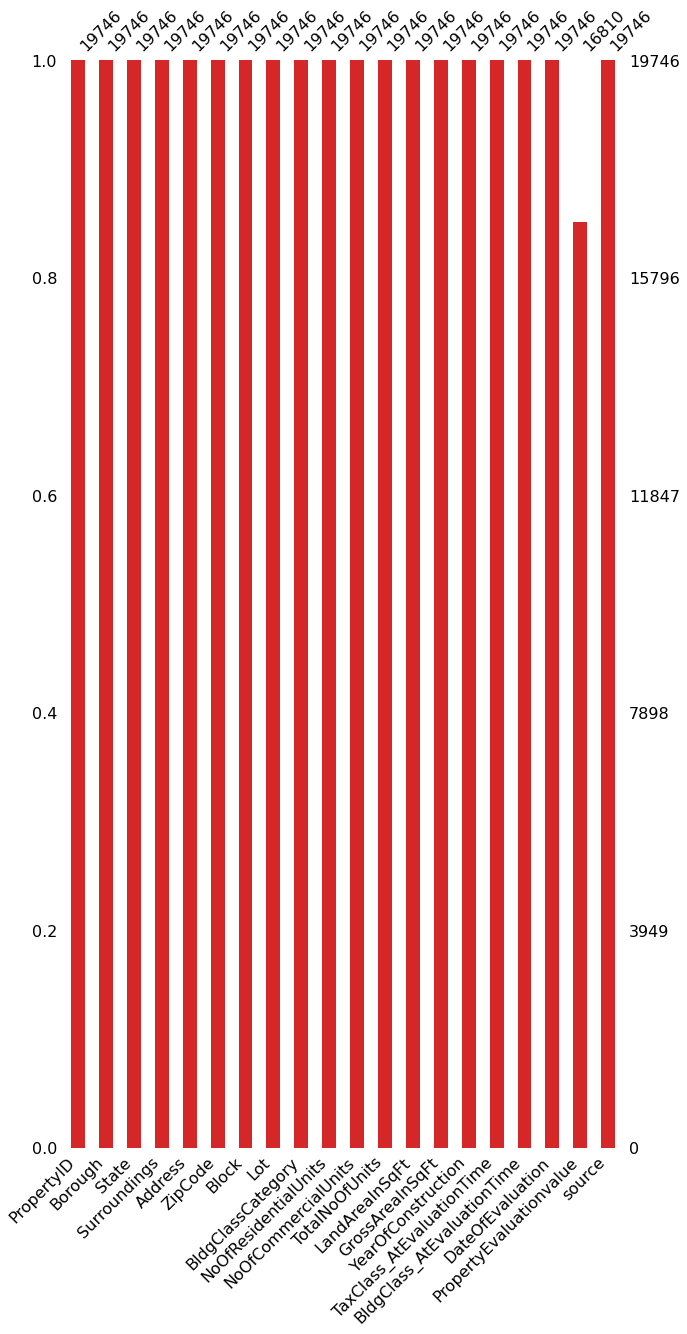

In [ ]:
missingno.bar(df, figsize = (10,20), color="tab:red")

In [ ]:
df['PropertyID'].value_counts()

PR11101    1
PR24262    1
PR24269    1
PR24268    1
PR24267    1
          ..
PR17682    1
PR17681    1
PR17680    1
PR17679    1
PR54036    1
Name: PropertyID, Length: 19746, dtype: int64

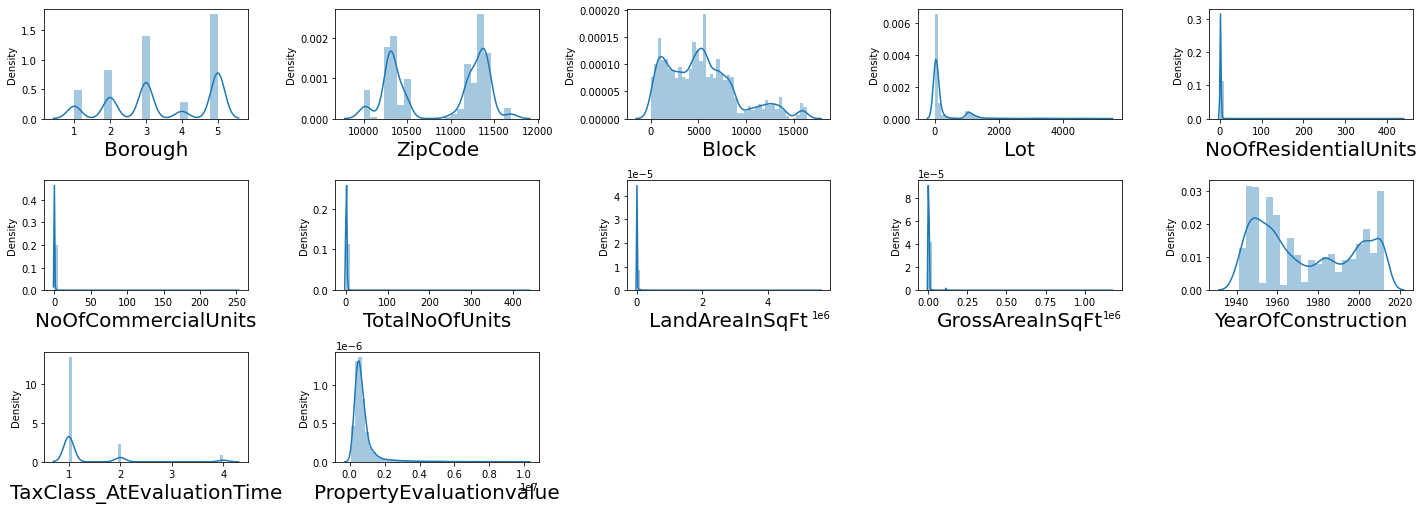

In [ ]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (20,40))
plotnumber = 1
for column in num_data:
    if plotnumber <=18:
        ax = plt.subplot(17,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
for col in num_data.columns:
    print(col,df[col].nunique())
    print('-'*20)

Borough 5
--------------------
ZipCode 174
--------------------
Block 6841
--------------------
Lot 1396
--------------------
NoOfResidentialUnits 74
--------------------
NoOfCommercialUnits 19
--------------------
TotalNoOfUnits 79
--------------------
LandAreaInSqFt 4194
--------------------
GrossAreaInSqFt 3550
--------------------
YearOfConstruction 72
--------------------
TaxClass_AtEvaluationTime 3
--------------------
PropertyEvaluationvalue 3694
--------------------


# Heat Map for checking the correlation

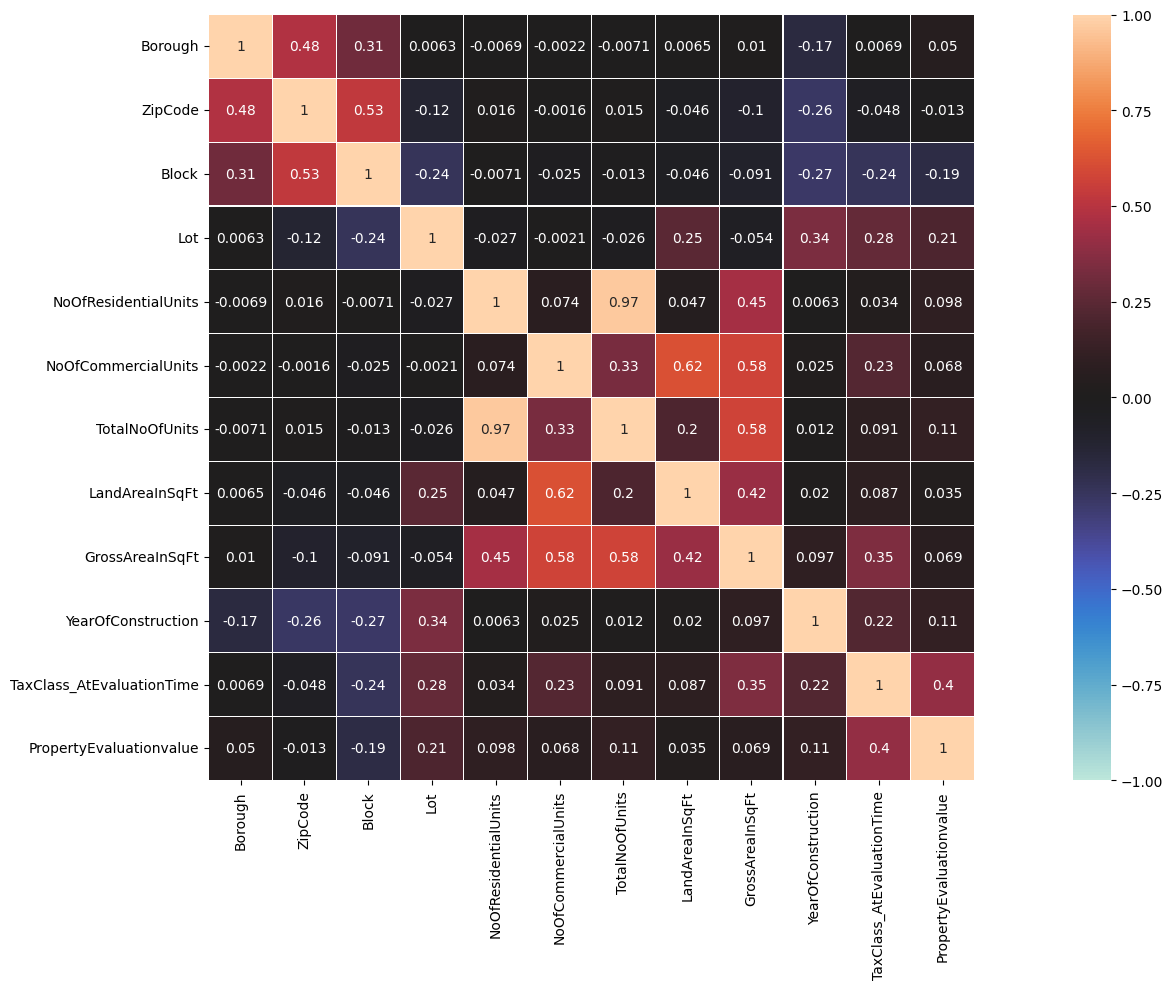

In [ ]:
plt.style.use('default')
df_corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

Looking at the above heat map we can say that many features are in good correlation with our target variable and also many features are having very poor relation with the target variable. The columns derived from year data are having negative relation with Sales Price.

Column "TaxClass_AtEvaluationTime" and " LandAreaInSqFt " is having highest correlation with target variable

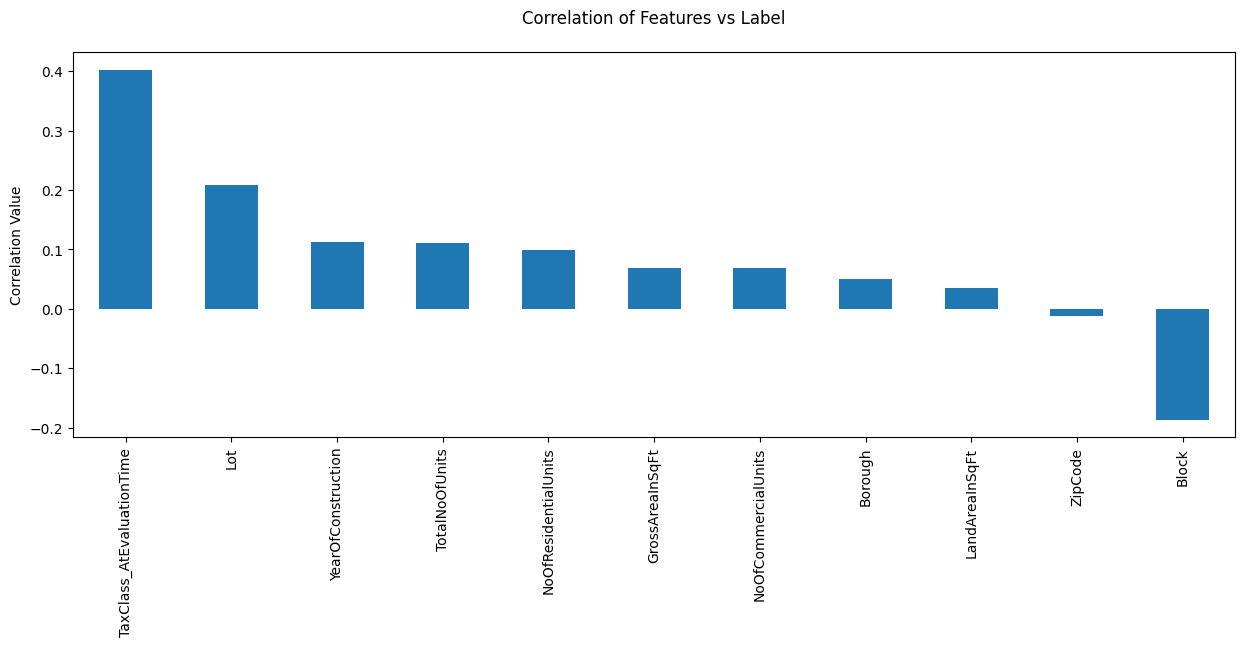

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['PropertyEvaluationvalue'].sort_values( ascending = False).drop('PropertyEvaluationvalue').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value")
plt.show()

looking at the above plot we can say that the features like TaxClass_AtEvaluationTime, Lot, YearOfConstruction, TotalNoOfUnits are having maximum positive relation with the target variable and features like ZipCode, Block are in negative relation with the target variable

## **EDA**

In [ ]:
col=['Borough','NoOfCommercialUnits','TaxClass_AtEvaluationTime']

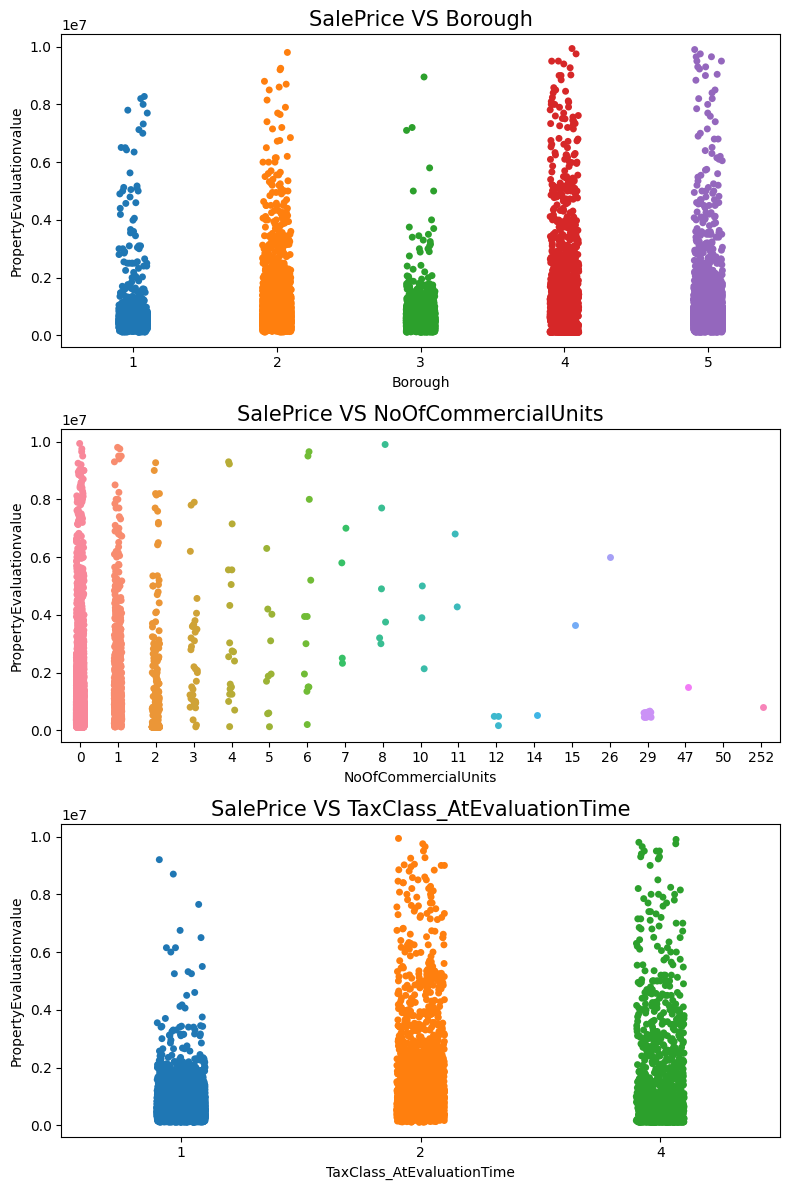

In [ ]:
plt.style.use('default')
plt.figure(figsize=(8,12))
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.stripplot(y=df['PropertyEvaluationvalue'],x=df[col[i]])
    plt.title(f"SalePrice VS {col[i]}",fontsize=15)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.tight_layout()

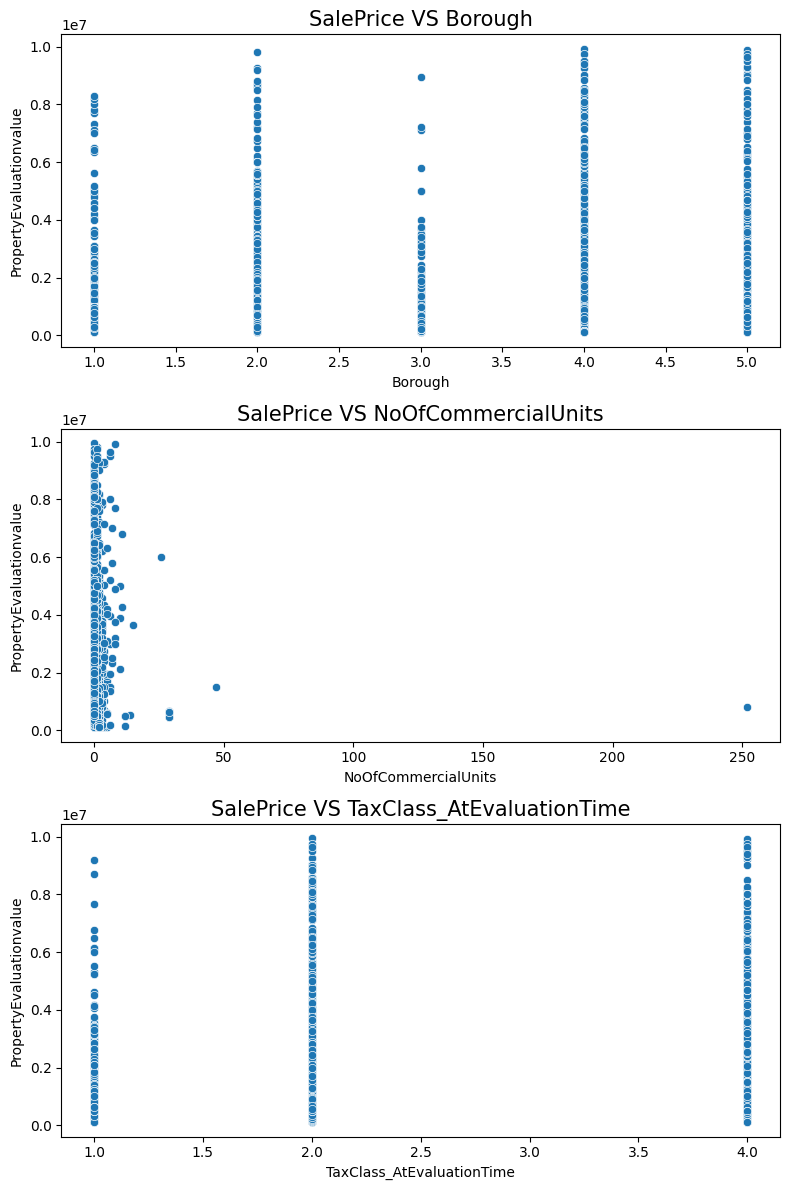

In [ ]:
plt.style.use('default')
plt.figure(figsize=(8,12))
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.scatterplot(y=df['PropertyEvaluationvalue'],x=df[col[i]])
    plt.title(f"SalePrice VS {col[i]}",fontsize=15)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.tight_layout()

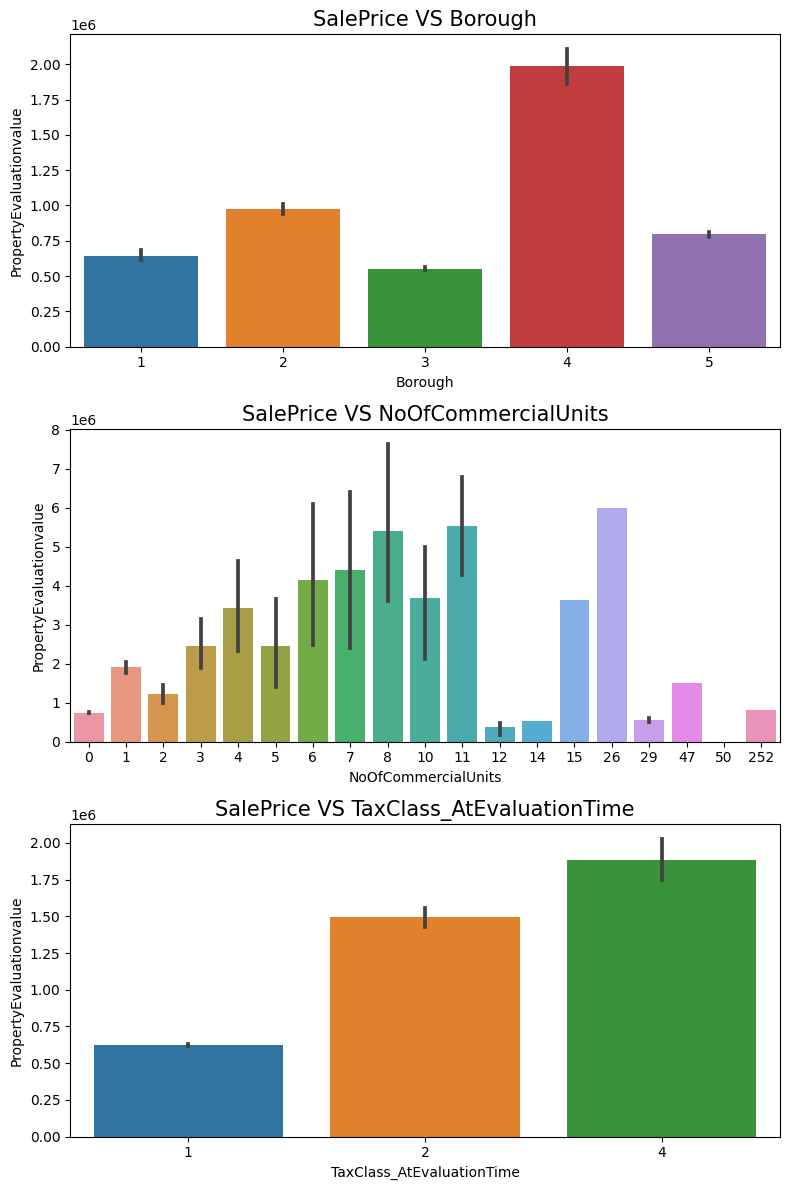

In [ ]:
plt.style.use('default')
plt.figure(figsize=(8,12))
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.barplot(y=df['PropertyEvaluationvalue'],x=df[col[i]])
    plt.title(f"SalePrice VS {col[i]}",fontsize=15)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.tight_layout()

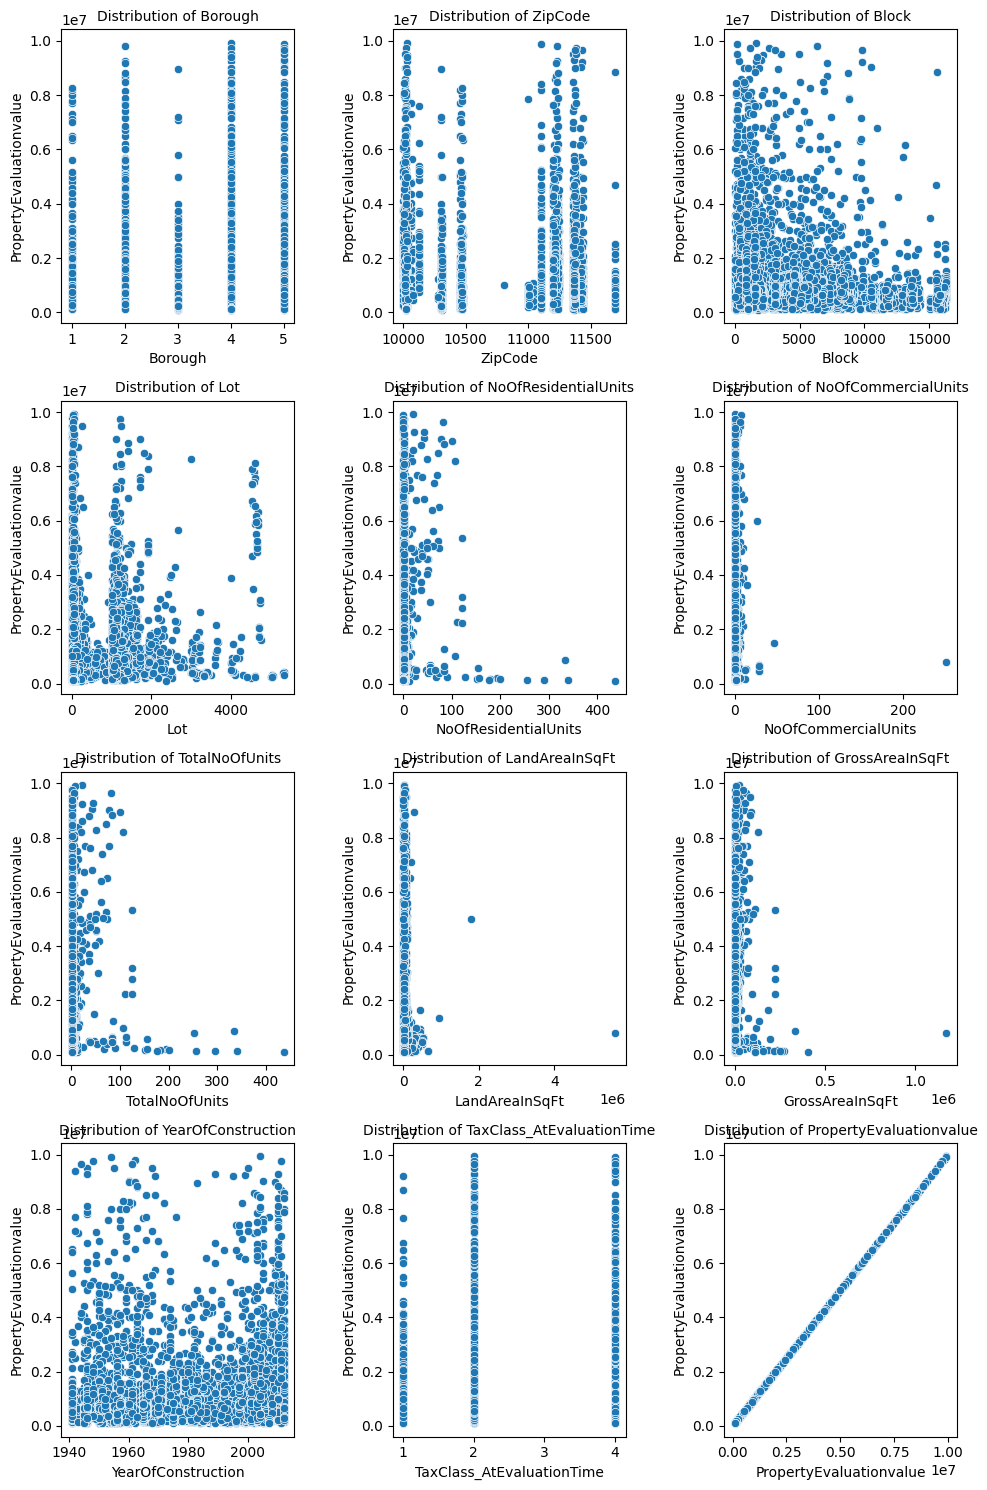

In [ ]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(num_data[column],y=df['PropertyEvaluationvalue'])
        plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Looking at these strip plots we don't find any trend, but there may some outliers present in NoOfCommercialUnits.

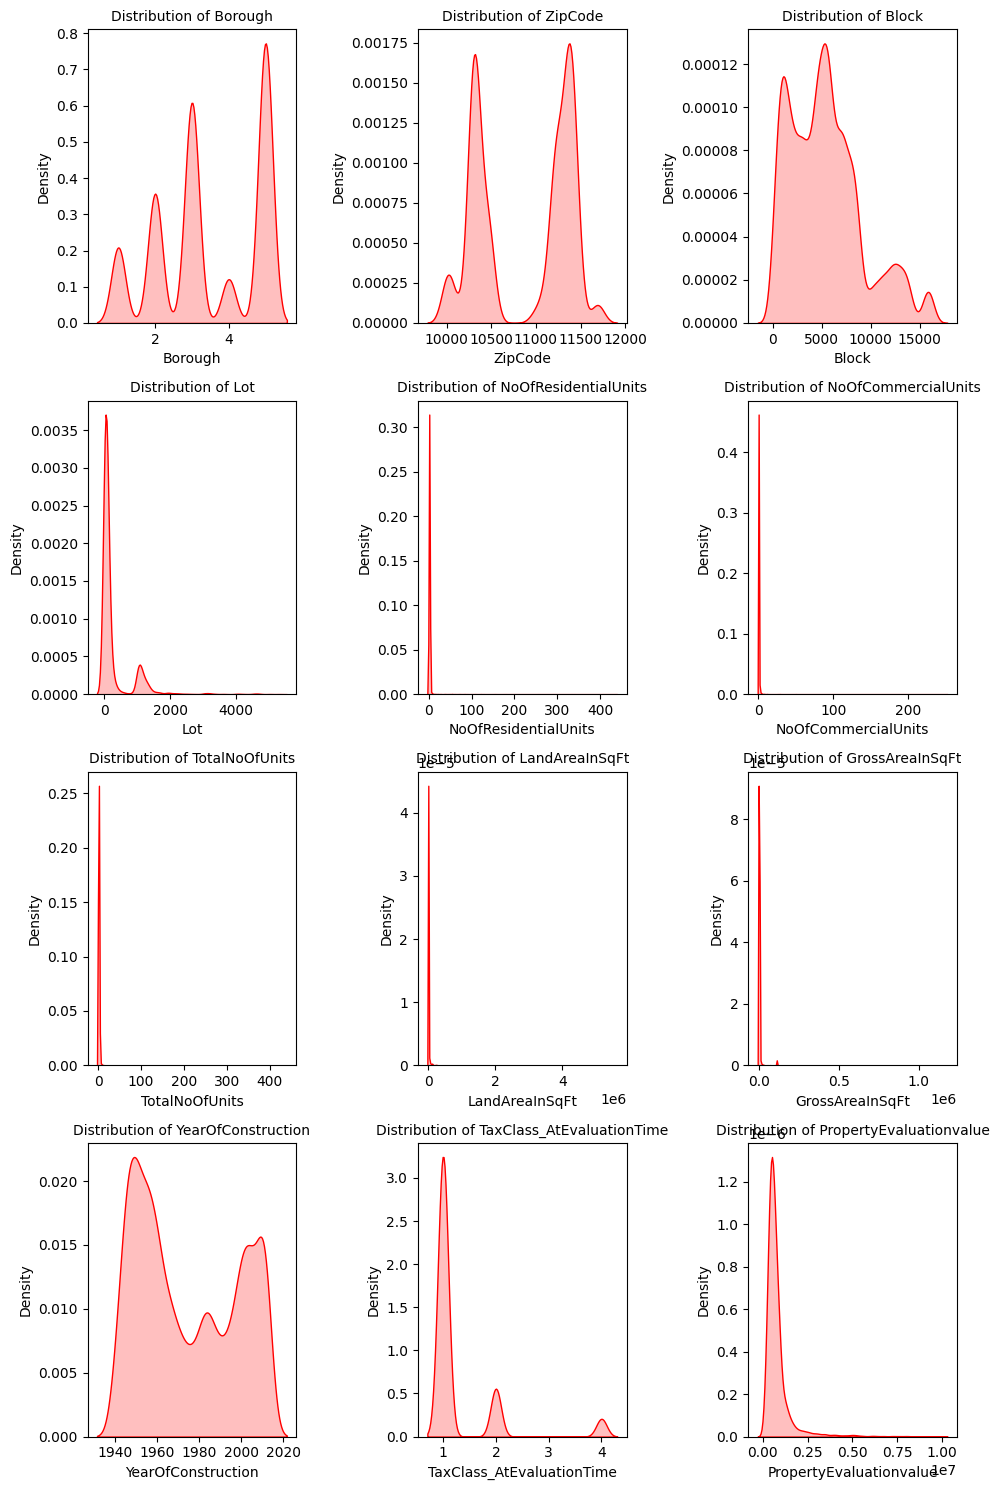

In [ ]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

## **Creating a new column using DateOfEvaluation &YearOfConstruction**

In [ ]:
df["Eval_year"] = df["DateOfEvaluation"].astype(str).apply(lambda x: x[0:4])

In [ ]:
df["Eval_year"]=df["Eval_year"].astype('int64')

In [ ]:
df['House_age'] = df["Eval_year"]-df['YearOfConstruction']
df['House_age'].head()

0    24
1    12
2    25
3    23
4    22
Name: House_age, dtype: int64

In [ ]:
df['House_age'].nunique()

75

In [ ]:
df["Eval_year"]=df["Eval_year"].astype('object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Borough,19746.0,3.431176,1.393996,1.0,2.00,3.0,5.00,5.0
ZipCode,19746.0,10866.069736,523.654412,10001.0,10312.00,11206.0,11364.00,11694.0
Block,19746.0,5389.887015,3692.221515,6.0,2398.25,5015.0,7346.75,16314.0
Lot,19746.0,268.283855,545.397573,1.0,25.00,52.0,138.00,5323.0
NoOfResidentialUnits,19746.0,1.831611,7.603957,0.0,1.00,1.0,2.00,437.0
NoOfCommercialUnits,19746.0,0.137648,2.070227,0.0,0.00,0.0,0.00,252.0
TotalNoOfUnits,19746.0,1.969260,8.028054,1.0,1.00,1.0,2.00,437.0
LandAreaInSqFt,19746.0,10938.339866,55788.510186,1.0,2100.00,3200.0,5000.00,5612000.0
GrossAreaInSqFt,19746.0,3678.798795,16064.716976,1.0,1224.00,1744.0,2448.00,1172005.0
YearOfConstruction,19746.0,1974.200041,23.648840,1941.0,1951.00,1970.0,1998.00,2012.0


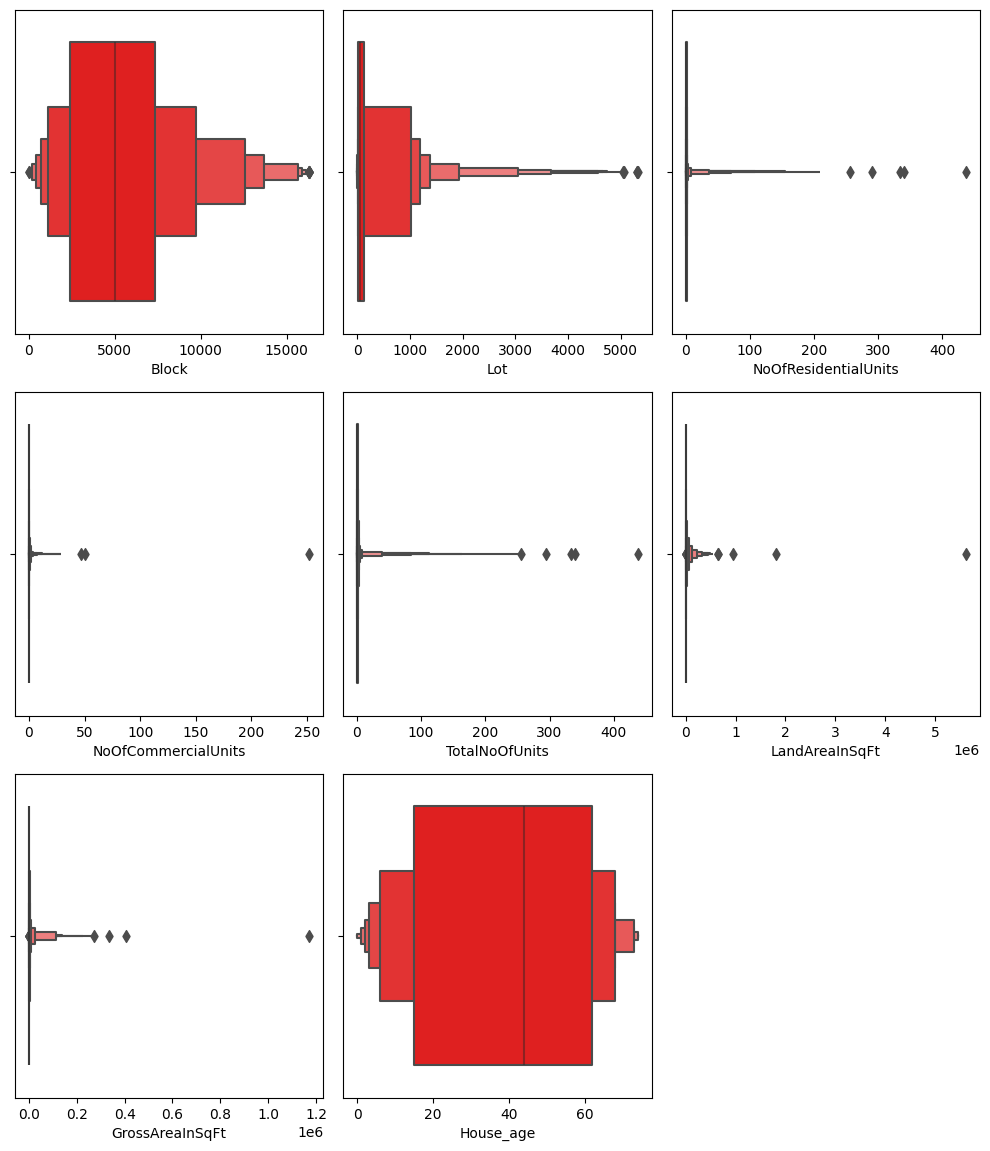

In [ ]:
#Lets have a look on distribution of our data
cols=['Block','Lot','NoOfResidentialUnits','NoOfCommercialUnits','TotalNoOfUnits','LandAreaInSqFt','GrossAreaInSqFt','House_age']
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in cols:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxenplot(df[column], color="red")
        #plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Now remove these outliers and generate new dataframe

# Outliers

In [ ]:
column = ['GrossAreaInSqFt','LandAreaInSqFt','TotalNoOfUnits','NoOfCommercialUnits','Lot','NoOfResidentialUnits']
for col in df.columns:
    if df[col].dtypes != 'object':
      percentile = df[col].quantile([0.01,0.98]).values
      df[col][df[col]<=percentile[0]]=percentile[0]
      df[col][df[col]>=percentile[1]]=percentile[1]

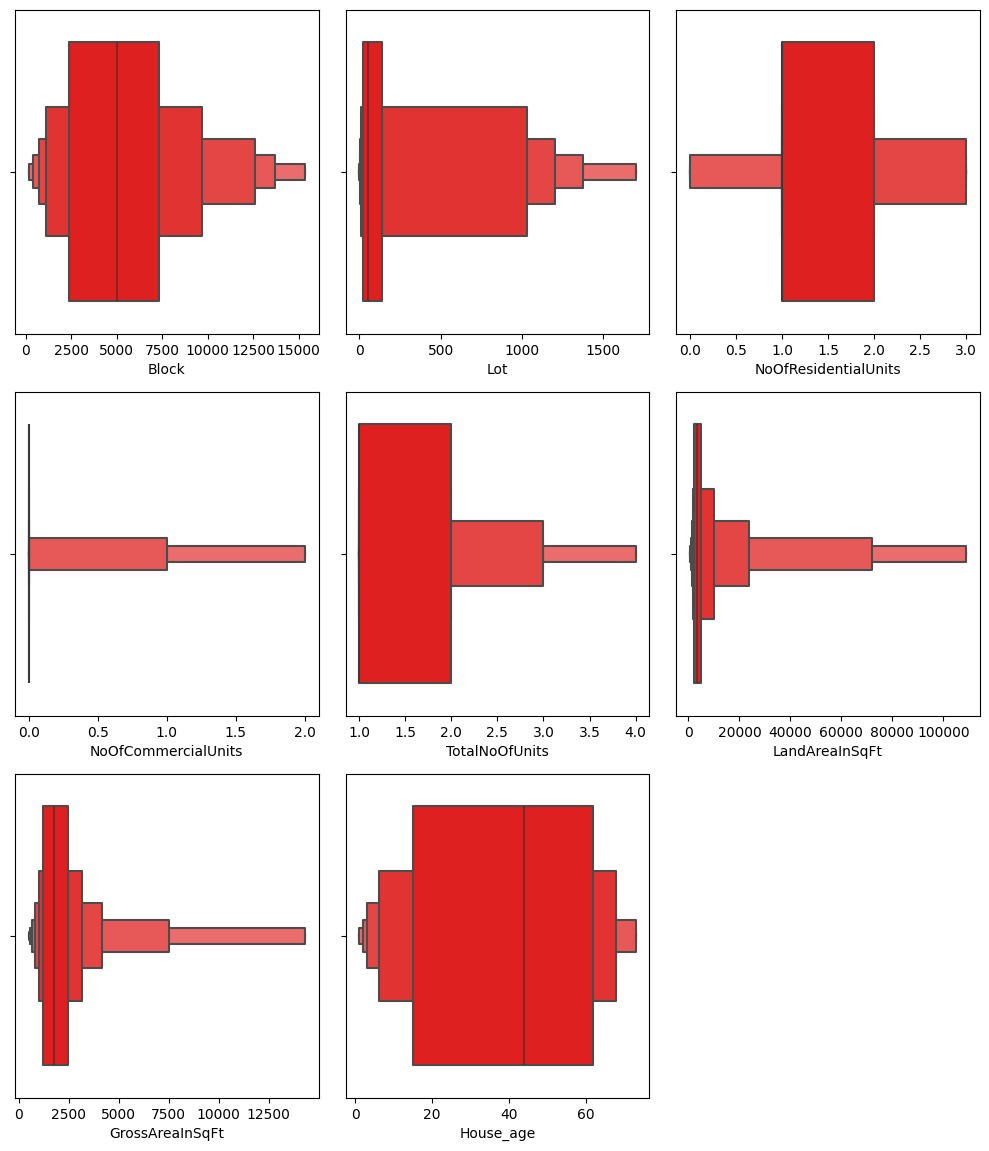

In [ ]:
#Lets have a look on distribution of our data
cols=['Block','Lot','NoOfResidentialUnits','NoOfCommercialUnits','TotalNoOfUnits','LandAreaInSqFt','GrossAreaInSqFt','House_age']
plt.style.use('default')
plt.figure(figsize = (10,15))
plotnumber = 1
for column in cols:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxenplot(df[column], color="red")
        #plt.title(f"Distribution of {column}",fontsize=10)
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19746 entries, 0 to 19745
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PropertyID                  19746 non-null  object        
 1   Borough                     19746 non-null  int64         
 2   State                       19746 non-null  object        
 3   Surroundings                19746 non-null  object        
 4   Address                     19746 non-null  object        
 5   ZipCode                     19746 non-null  float64       
 6   Block                       19746 non-null  float64       
 7   Lot                         19746 non-null  float64       
 8   BldgClassCategory           19746 non-null  object        
 9   NoOfResidentialUnits        19746 non-null  int64         
 10  NoOfCommercialUnits         19746 non-null  int64         
 11  TotalNoOfUnits              19746 non-null  int64     

In [ ]:
df.isna().sum()

PropertyID                       0
Borough                          0
State                            0
Surroundings                     0
Address                          0
ZipCode                          0
Block                            0
Lot                              0
BldgClassCategory                0
NoOfResidentialUnits             0
NoOfCommercialUnits              0
TotalNoOfUnits                   0
LandAreaInSqFt                   0
GrossAreaInSqFt                  0
YearOfConstruction               0
TaxClass_AtEvaluationTime        0
BldgClass_AtEvaluationTime       0
DateOfEvaluation                 0
PropertyEvaluationvalue       2936
source                           0
Eval_year                        0
House_age                        0
dtype: int64

In [ ]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 30.9 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


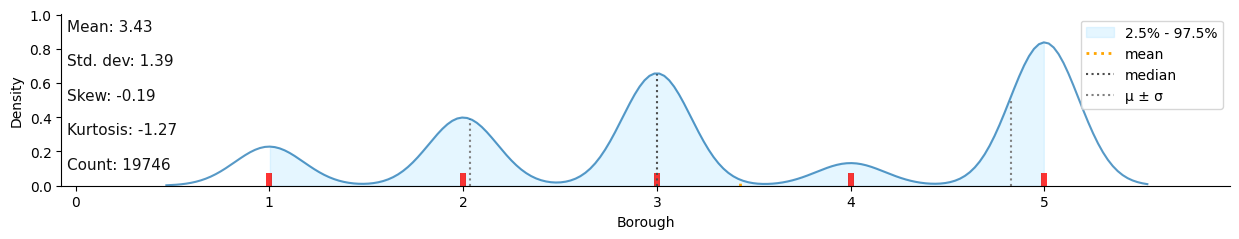

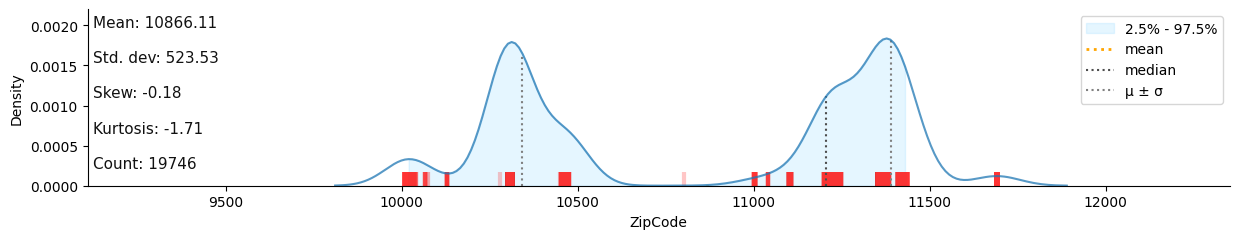

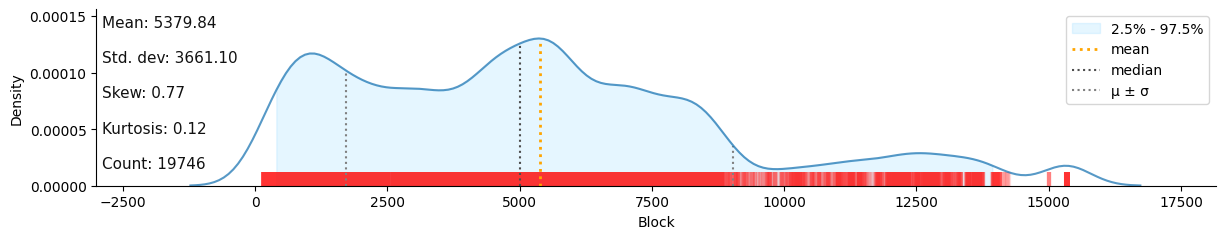

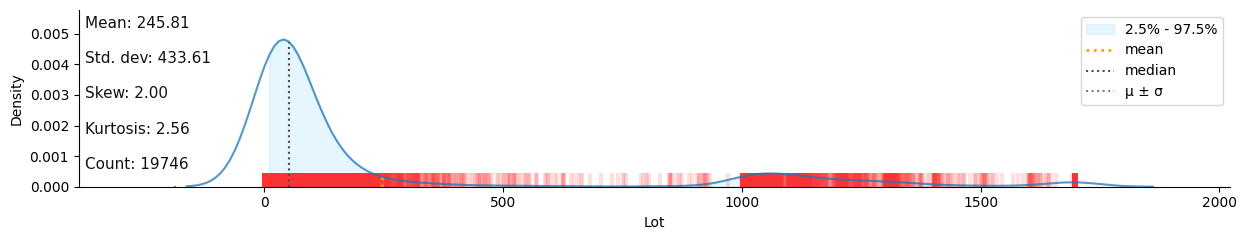

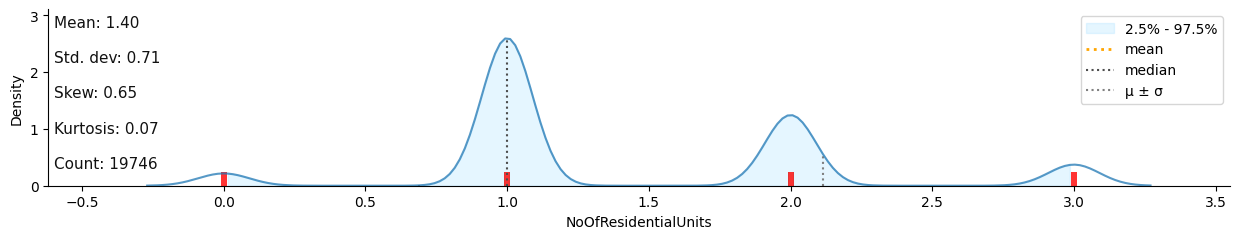

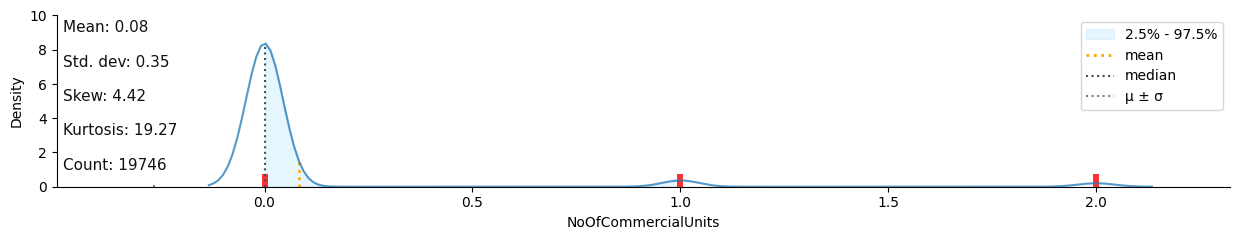

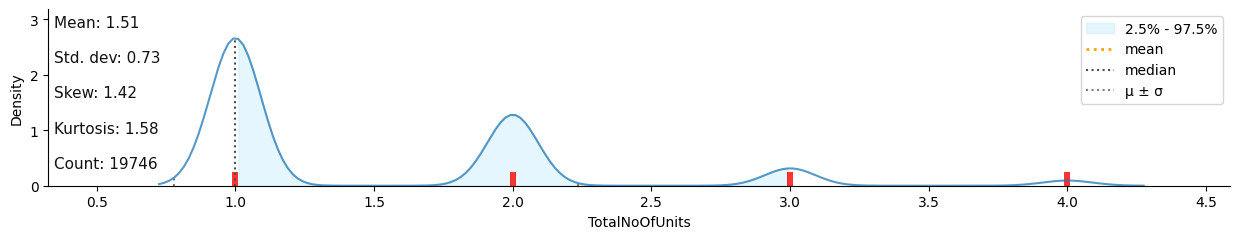

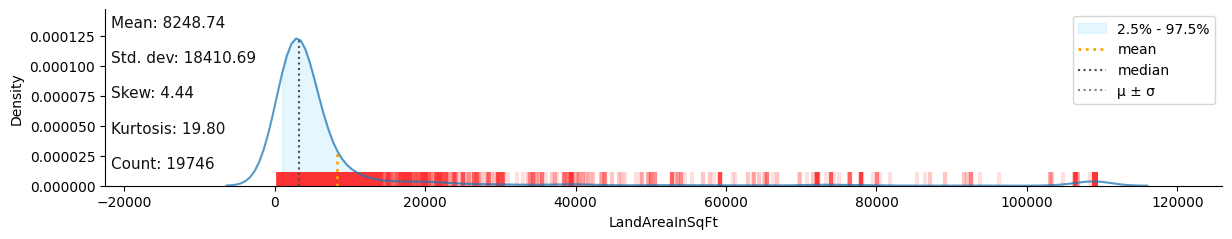

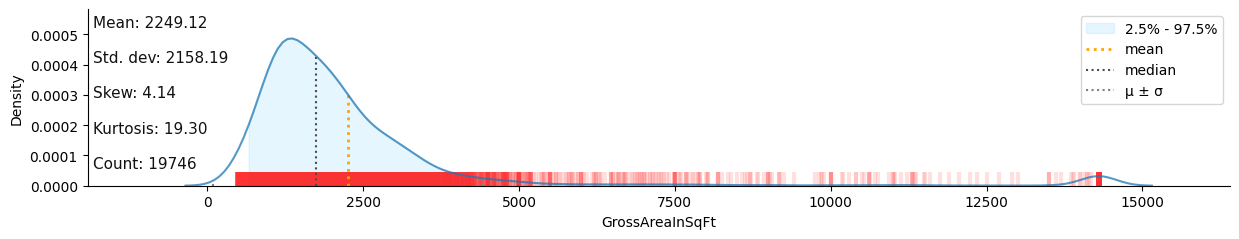

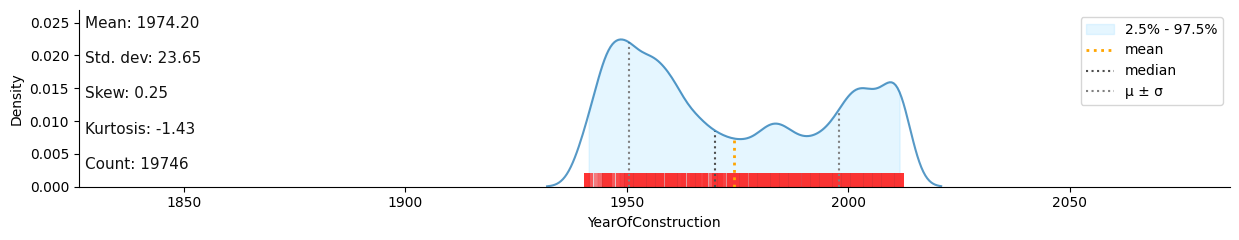

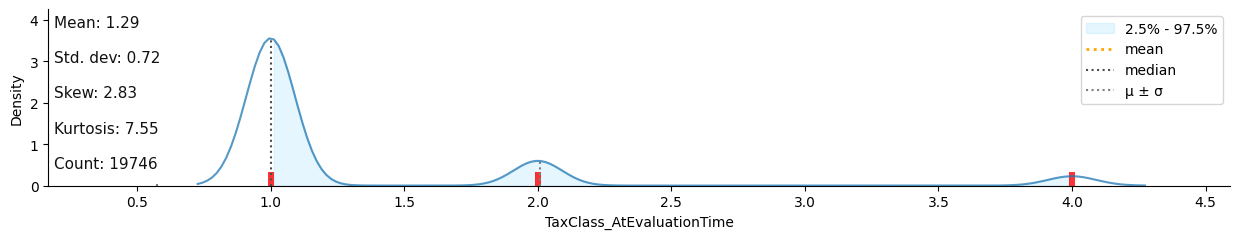

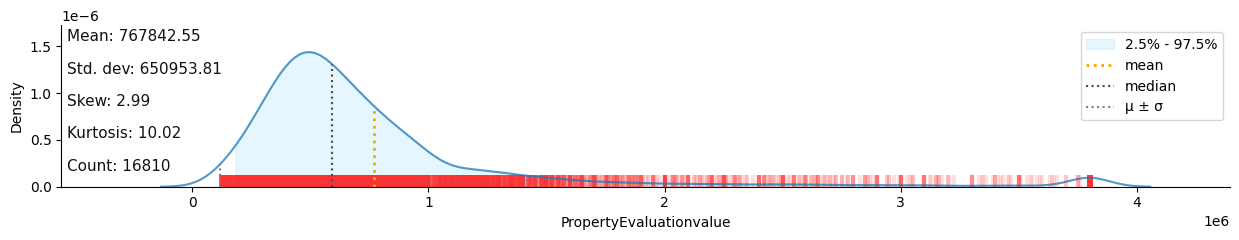

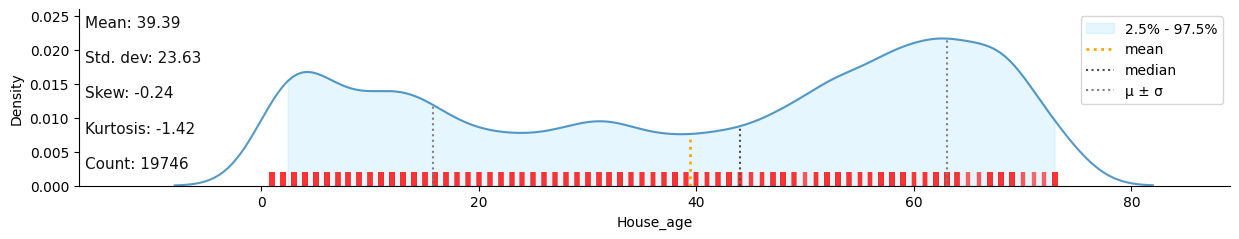

In [ ]:
#lets plot a cat_plot using klib
klib.dist_plot(df)

In [ ]:
klib.corr_mat(df)

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue,House_age
Borough,1.00,0.48,0.31,-0.01,-0.08,0.00,-0.08,0.02,-0.04,-0.17,0.01,0.06,0.17
ZipCode,0.48,1.00,0.53,-0.12,0.18,-0.04,0.16,-0.10,-0.04,-0.26,-0.05,0.01,0.26
Block,0.31,0.53,1.00,-0.28,0.10,-0.12,0.03,-0.10,-0.09,-0.27,-0.24,-0.22,0.27
Lot,-0.01,-0.12,-0.28,1.00,-0.24,-0.08,-0.28,0.55,-0.20,0.39,0.31,0.23,-0.38
NoOfResidentialUnits,-0.08,0.18,0.10,-0.24,1.00,-0.33,0.83,-0.17,0.05,0.05,-0.43,-0.05,-0.05
NoOfCommercialUnits,0.00,-0.04,-0.12,-0.08,-0.33,1.00,0.20,0.02,0.65,0.07,0.79,0.27,-0.07
TotalNoOfUnits,-0.08,0.16,0.03,-0.28,0.83,0.20,1.00,-0.16,0.44,0.08,0.02,0.13,-0.09
LandAreaInSqFt,0.02,-0.10,-0.10,0.55,-0.17,0.02,-0.16,1.00,0.01,0.08,0.18,0.12,-0.07
GrossAreaInSqFt,-0.04,-0.04,-0.09,-0.20,0.05,0.65,0.44,0.01,1.00,0.13,0.51,0.37,-0.14
YearOfConstruction,-0.17,-0.26,-0.27,0.39,0.05,0.07,0.08,0.08,0.13,1.00,0.22,0.13,-1.00


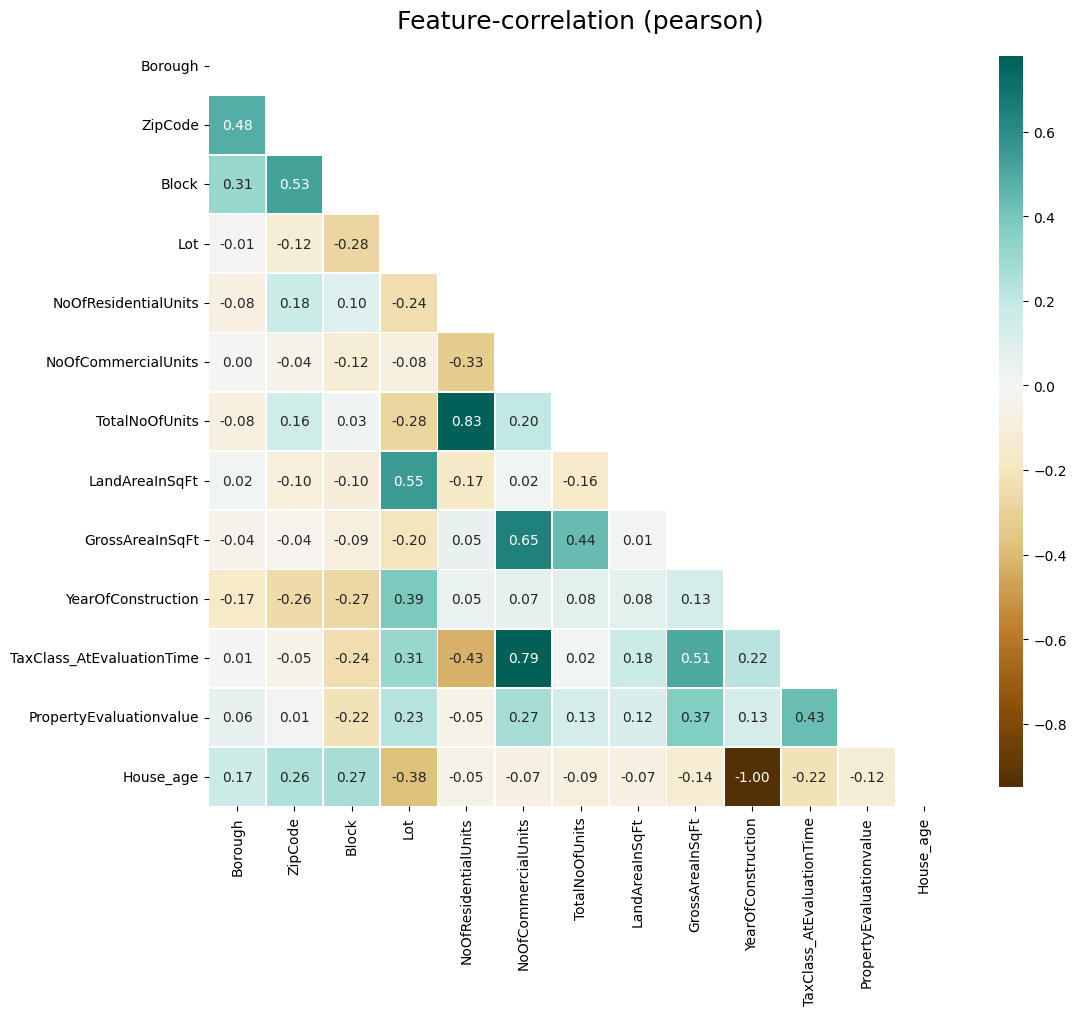

In [ ]:
klib.corr_plot(df)

In [ ]:
df.drop(columns=['NoOfCommercialUnits','TotalNoOfUnits','NoOfResidentialUnits'], inplace = True)

As I don't see any strong correlation between target and NoOfCommercialUnits, TotalNoOfUnits and NoOfResidentialUnits . So, I droped all these columns
 

# get dumies

In [ ]:
df= pd.get_dummies(df, columns=['Borough','TaxClass_AtEvaluationTime'],drop_first=True)

In [ ]:

df.head(5)

,PropertyID,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,LandAreaInSqFt,GrossAreaInSqFt,...,PropertyEvaluationvalue,source,Eval_year,House_age,Borough_2,Borough_3,Borough_4,Borough_5,TaxClass_AtEvaluationTime_2,TaxClass_AtEvaluationTime_4
0,PR11101,NY,BATHGATE,1473 CROTONA PLACE,10456.0,2927.0,127.0,02 TWO FAMILY DWELLINGS,1900,2394.0,...,540000.0,train,2014,24,0,0,0,0,0,0
1,PR11102,NY,BATHGATE,453 EAST 181,10457.0,3037.0,110.0,03 THREE FAMILY DWELLINGS,1687,3037.0,...,750000.0,train,2014,12,0,0,0,0,0,0
2,PR11103,NY,BATHGATE,511 EAST 171 STREET,10457.0,2912.0,155.0,02 TWO FAMILY DWELLINGS,2000,2400.0,...,470000.0,train,2014,25,0,0,0,0,0,0
3,PR11104,NY,BATHGATE,547 CLAREMONT PARKWAY,10457.0,2929.0,134.0,02 TWO FAMILY DWELLINGS,2356,2394.0,...,570000.0,train,2014,23,0,0,0,0,0,0
4,PR11105,NY,BATHGATE,2063 WASHINGTON AVENUE,10457.0,3036.0,140.0,02 TWO FAMILY DWELLINGS,3346,2308.0,...,640000.0,train,2015,22,0,0,0,0,0,0


In [ ]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(df[col].value_counts())
        print('='*30)

PR11101    1
PR24262    1
PR24269    1
PR24268    1
PR24267    1
          ..
PR17682    1
PR17681    1
PR17680    1
PR17679    1
PR54036    1
Name: PropertyID, Length: 19746, dtype: int64
NY    19746
Name: State, dtype: int64
FLUSHING-NORTH              920
GREAT KILLS                 667
BAYSIDE                     534
CANARSIE                    423
ELTINGVILLE                 405
                           ... 
CO-OP CITY                    2
UPPER EAST SIDE (96-110)      2
NEW BRIGHTON-ST. GEORGE       1
FRESH KILLS                   1
BRONX PARK                    1
Name: Surroundings, Length: 244, dtype: int64
102 WEST 57TH STREET     134
102 WEST 57TH ST          48
550 VANDERBILT AVENUE     41
131-01 40TH ROAD          40
242 BROOME STREET         40
                        ... 
1660 DECATUR STREET        1
918 CYPRESS AVENUE         1
1827 PALMETTO STREET       1
63-34 FRESH POND ROAD      1
608 WEST 149 STREET        1
Name: Address, Length: 17730, dtype: int64
01 ONE FAMILY

# Devide train and test datasets

In [ ]:
#Divide into test and train:
df_train = df.loc[df['source']== 'train']
df_test = df.loc[df['source']== 'test']
test.reset_index(drop=True,inplace=True)

In [ ]:
df_train.drop(columns = 'source', inplace = True)
df_test.drop(columns = 'source', inplace = True)

In [ ]:
#lets saperate data into label and features
x = df_train.drop(columns = 'PropertyEvaluationvalue')
y = df_train["PropertyEvaluationvalue"]

In [ ]:
x.skew()

ZipCode                       -0.197262
Block                          0.756577
Lot                            2.013326
LandAreaInSqFt                 4.465250
GrossAreaInSqFt                4.158202
YearOfConstruction             0.263578
Eval_year                     -0.406404
House_age                     -0.260581
Borough_2                      1.736419
Borough_3                      0.924373
Borough_4                      3.800957
Borough_5                      0.501215
TaxClass_AtEvaluationTime_2    2.103544
TaxClass_AtEvaluationTime_4    4.099946
dtype: float64

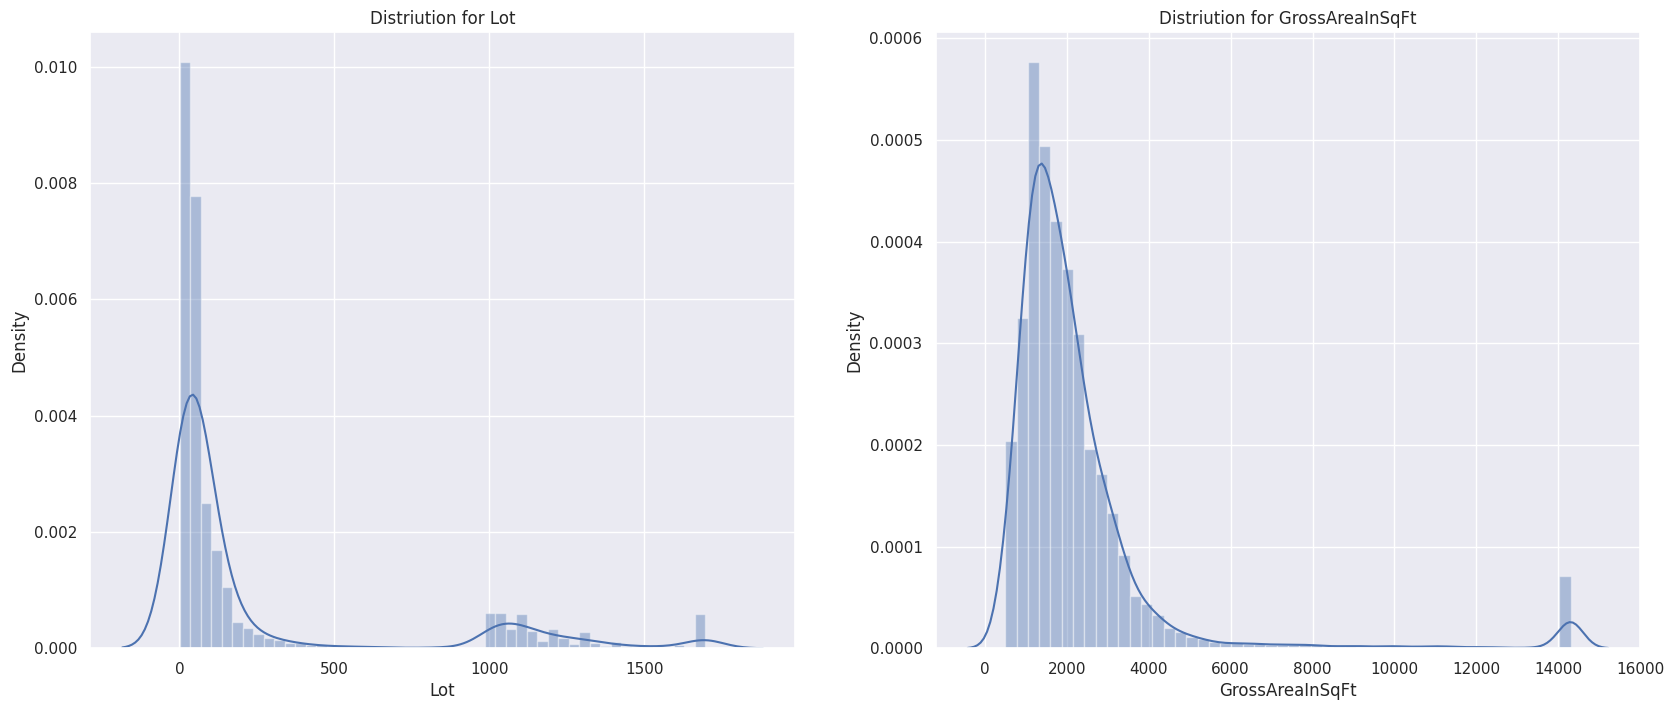

In [ ]:
#lets check the count of airlines and check the relation between airline and Price
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(x.Lot)
plt.title('Distriution for Lot')

plt.subplot(1,2,2)
sns.distplot(x.GrossAreaInSqFt)
plt.title('Distriution for GrossAreaInSqFt')

plt.show()

To treat the skewness, I will apply log trasformation to these two columns

In [ ]:
x['Lot'] = np.log(x['Lot'])
x['GrossAreaInSqFt'] = np.log(x['GrossAreaInSqFt'])

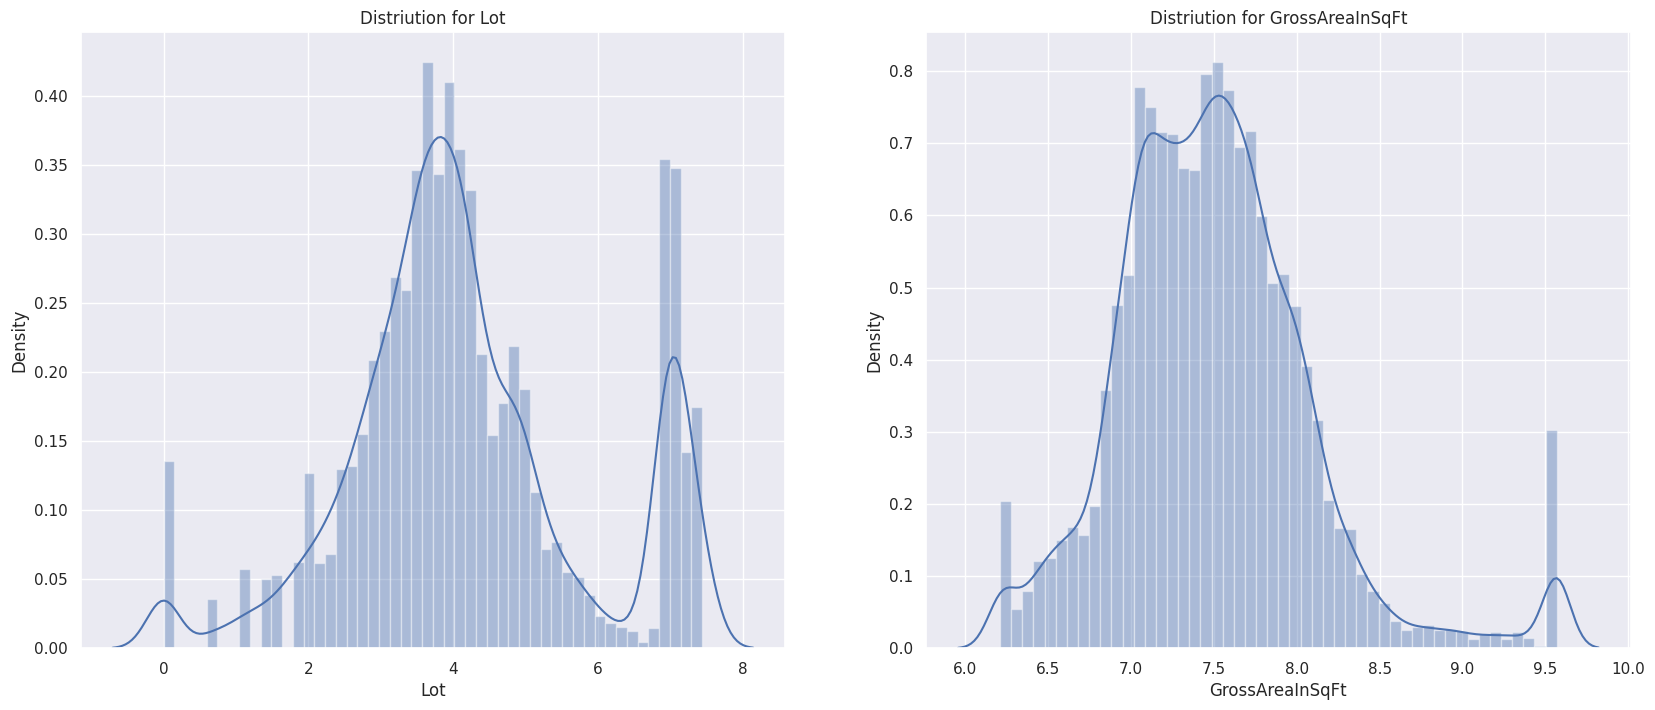

In [ ]:
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(x.Lot)
plt.title('Distriution for Lot')

plt.subplot(1,2,2)
sns.distplot(x.GrossAreaInSqFt)
plt.title('Distriution for GrossAreaInSqFt')

plt.show()

In [ ]:

num_data = x.select_dtypes(include = [np.number])
cat_data = x.select_dtypes(exclude=[np.number])

In [ ]:
cat_data

,PropertyID,State,Surroundings,Address,BldgClassCategory,BldgClass_AtEvaluationTime,DateOfEvaluation,Eval_year
0,PR11101,NY,BATHGATE,1473 CROTONA PLACE,02 TWO FAMILY DWELLINGS,B1,2014-05-30,2014
1,PR11102,NY,BATHGATE,453 EAST 181,03 THREE FAMILY DWELLINGS,C0,2014-09-13,2014
2,PR11103,NY,BATHGATE,511 EAST 171 STREET,02 TWO FAMILY DWELLINGS,B1,2014-09-28,2014
3,PR11104,NY,BATHGATE,547 CLAREMONT PARKWAY,02 TWO FAMILY DWELLINGS,B1,2014-06-05,2014
4,PR11105,NY,BATHGATE,2063 WASHINGTON AVENUE,02 TWO FAMILY DWELLINGS,B1,2015-02-07,2015
...,...,...,...,...,...,...,...,...
16805,PR27906,NY,CIVIC CENTER,30 PARK PLACE,13 CONDOS - ELEVATOR APARTMENTS,R4,2014-11-30,2014
16806,PR27907,NY,CIVIC CENTER,56 LEONARD STREET,13 CONDOS - ELEVATOR APARTMENTS,R4,2014-12-19,2014
16807,PR27908,NY,CIVIC CENTER,56 LEONARD STREET,13 CONDOS - ELEVATOR APARTMENTS,R4,2014-11-16,2014
16808,PR27909,NY,TRIBECA,250 SOUTH END AVENUE,13 CONDOS - ELEVATOR APARTMENTS,R4,2014-09-17,2014


# Applying standard scaler to numerical data

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

# Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))


In [ ]:
num

,ZipCode,Block,Lot,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,House_age,Borough_2,Borough_3,Borough_4,Borough_5,TaxClass_AtEvaluationTime_2,TaxClass_AtEvaluationTime_4
0,-0.793844,-0.677124,0.409432,-0.345570,0.475008,0.677776,-0.660907,-0.456124,-0.63948,-0.247055,-0.780333,-0.399538,-0.23092
1,-0.791931,-0.647221,0.321803,-0.357252,0.877980,1.185565,-1.169186,-0.456124,-0.63948,-0.247055,-0.780333,-0.399538,-0.23092
2,-0.791931,-0.681202,0.530923,-0.340086,0.479247,0.635460,-0.618550,-0.456124,-0.63948,-0.247055,-0.780333,-0.399538,-0.23092
3,-0.791931,-0.676580,0.442148,-0.320561,0.475008,0.720092,-0.703263,-0.456124,-0.63948,-0.247055,-0.780333,-0.399538,-0.23092
4,-0.791931,-0.647493,0.468858,-0.266263,0.413040,0.804723,-0.745620,-0.456124,-0.63948,-0.247055,-0.780333,-0.399538,-0.23092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,-1.647899,-1.426596,1.785493,1.179967,0.742168,1.270196,-1.253899,-0.456124,-0.63948,4.047674,-0.780333,2.502894,-0.23092
16806,-1.641109,-1.424965,1.699817,0.236783,0.371435,1.227880,-1.211543,-0.456124,-0.63948,4.047674,-0.780333,2.502894,-0.23092
16807,-1.641109,-1.424965,1.726973,0.236783,0.314063,1.227880,-1.211543,-0.456124,-0.63948,4.047674,-0.780333,2.502894,-0.23092
16808,-1.130455,-1.426596,1.990342,0.243693,-1.885936,0.296935,-0.279697,-0.456124,-0.63948,4.047674,-0.780333,2.502894,-0.23092


## **combining categorical and numerical data**

In [ ]:
X = pd.concat([num, cat_data], axis = 1)

In [ ]:
X

,ZipCode,Block,Lot,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,House_age,Borough_2,Borough_3,Borough_4,...,TaxClass_AtEvaluationTime_2,TaxClass_AtEvaluationTime_4,PropertyID,State,Surroundings,Address,BldgClassCategory,BldgClass_AtEvaluationTime,DateOfEvaluation,Eval_year
0,-0.793844,-0.677124,0.409432,-0.345570,0.475008,0.677776,-0.660907,-0.456124,-0.63948,-0.247055,...,-0.399538,-0.23092,0.0,0.0,9.0,3098.0,3.0,9.0,334.0,2.0
1,-0.791931,-0.647221,0.321803,-0.357252,0.877980,1.185565,-1.169186,-0.456124,-0.63948,-0.247055,...,-0.399538,-0.23092,1.0,0.0,9.0,10564.0,5.0,13.0,415.0,2.0
2,-0.791931,-0.681202,0.530923,-0.340086,0.479247,0.635460,-0.618550,-0.456124,-0.63948,-0.247055,...,-0.399538,-0.23092,2.0,0.0,9.0,11221.0,3.0,9.0,426.0,2.0
3,-0.791931,-0.676580,0.442148,-0.320561,0.475008,0.720092,-0.703263,-0.456124,-0.63948,-0.247055,...,-0.399538,-0.23092,3.0,0.0,9.0,11514.0,3.0,9.0,339.0,2.0
4,-0.791931,-0.647493,0.468858,-0.266263,0.413040,0.804723,-0.745620,-0.456124,-0.63948,-0.247055,...,-0.399538,-0.23092,4.0,0.0,9.0,5520.0,3.0,9.0,524.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,-1.647899,-1.426596,1.785493,1.179967,0.742168,1.270196,-1.253899,-0.456124,-0.63948,4.047674,...,2.502894,-0.23092,16805.0,0.0,42.0,8269.0,16.0,79.0,474.0,2.0
16806,-1.641109,-1.424965,1.699817,0.236783,0.371435,1.227880,-1.211543,-0.456124,-0.63948,4.047674,...,2.502894,-0.23092,16806.0,0.0,42.0,11616.0,16.0,79.0,487.0,2.0
16807,-1.641109,-1.424965,1.726973,0.236783,0.314063,1.227880,-1.211543,-0.456124,-0.63948,4.047674,...,2.502894,-0.23092,16807.0,0.0,42.0,11616.0,16.0,79.0,464.0,2.0
16808,-1.130455,-1.426596,1.990342,0.243693,-1.885936,0.296935,-0.279697,-0.456124,-0.63948,4.047674,...,2.502894,-0.23092,16808.0,0.0,217.0,7144.0,16.0,79.0,417.0,2.0


## **Finding best random_state**

In [ ]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(50,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.38237902738427954 on Random State 52


In [ ]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = 52)

## **Building a function for model with evaluation**

In [ ]:
def BuiltModel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print("Training r2 Score in percentage :", r2_score(y_train,y_pred)*100,'%')
    print(f"Testing r2 Score in percentage :", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X, y, cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

## **LinearRegression Model**

MAE : 0.35167319512374207
RMSE : 0.5179802200300752
------------------------------
Training r2 Score in percentage : 36.75401499284977 %
Testing r2 Score in percentage : 33.4008834818193 %
------------------------------

Cross validation score : 37.232196506405664

Accuracy Score - Cross Validation Score : -3.8313130245863647


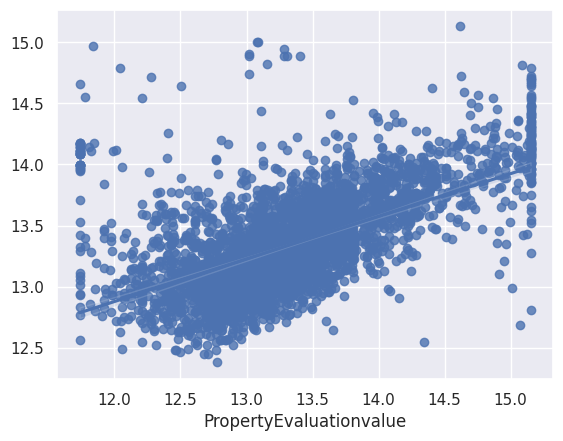

In [ ]:
lr = LinearRegression()
BuiltModel(lr)

## **DecisionTreeRegressor Model**

MAE : 0.3028140865381101
RMSE : 0.4708242718371328
------------------------------
Training r2 Score in percentage : 100.0 %
Testing r2 Score in percentage : 44.975031416197666 %
------------------------------

Cross validation score : 19.088467265330763

Accuracy Score - Cross Validation Score : 25.886564150866903


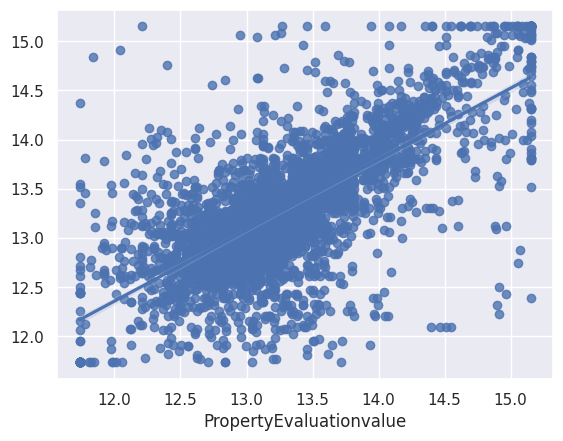

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
BuiltModel(dt)

## RandomForestRegressor Model

MAE : 0.22434049349585616
RMSE : 0.3460240761104336
------------------------------
Training r2 Score in percentage : 95.77892133583761 %
Testing r2 Score in percentage : 70.27959303716497 %
------------------------------

Cross validation score : 56.898833699535366

Accuracy Score - Cross Validation Score : 13.380759337629605


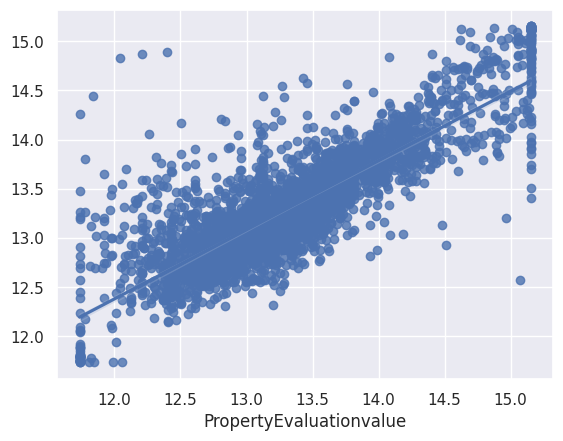

In [ ]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
BuiltModel(rf)

# XGBRegressor model

MAE : 0.2445215490438968
RMSE : 0.3626729064692736
------------------------------
Training r2 Score in percentage : 70.04660861829906 %
Testing r2 Score in percentage : 67.35081520813996 %
------------------------------

Cross validation score : 57.767154089503016

Accuracy Score - Cross Validation Score : 9.583661118636947


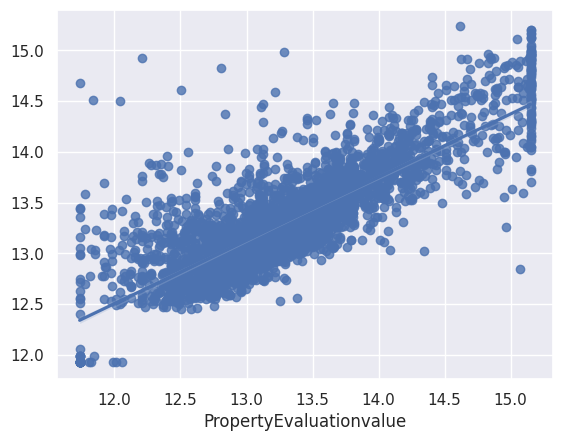

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(verbosity = 0)
BuiltModel(xgb)

## **ExtraTreesRegressor model**

MAE : 0.21575167943063506
RMSE : 0.33495688991302
------------------------------
Training r2 Score in percentage : 100.0 %
Testing r2 Score in percentage : 72.15033680175694 %
------------------------------

Cross validation score : 69.77360437847645

Accuracy Score - Cross Validation Score : 2.3767324232804867


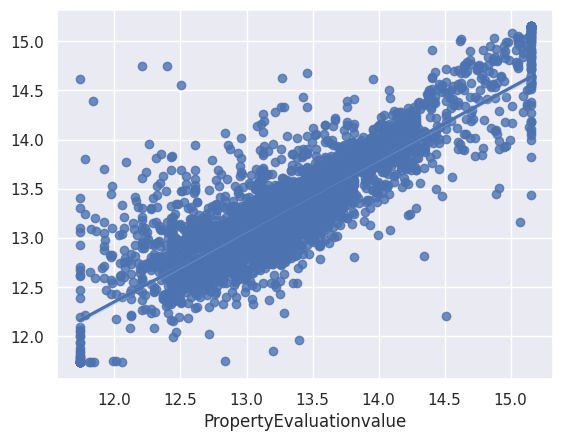

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
BuiltModel(ext)

## **LGBMRegressor model**

MAE : 0.21883463158853758
RMSE : 0.3368248786918055
------------------------------
Training r2 Score in percentage : 80.45746335506647 %
Testing r2 Score in percentage : 71.83884645449557 %
------------------------------

Cross validation score : 63.76413579008944

Accuracy Score - Cross Validation Score : 8.074710664406126


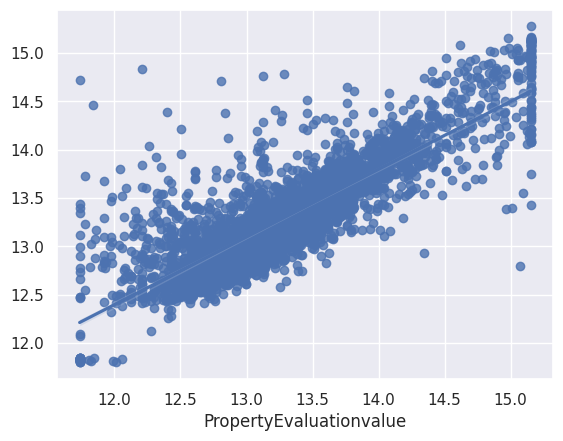

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
BuiltModel(lgbm)

As we can see RandomForestRegressor is giving least difference in accuracy and CV-score among all these algorithms, so I am selecting this for our final model as best suitable algorithm

## **HyperParameter Tuning**

In [ ]:
#lets selects different parameters for tuning
grid_params = {
                'max_depth': [8,9,10,12],
                'n_estimators':[500,700,900,1000],
                'min_samples_split': [2]
                }

In [ ]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

# Final Model

In [ ]:
#lets train and test our final model with best parameters
model = RandomForestRegressor(max_depth = 12, min_samples_split = 2, n_estimators = 700)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.22360771497704193
RMSE : 0.3444403802987606
------------------------------
 
r2 Score: 70.55102139024783 %


**Great we have got improved our accuracy from 72.60% to 88.99% after Hyperparameter tuning**

## **Lets see final Actual Vs Predicted sample**

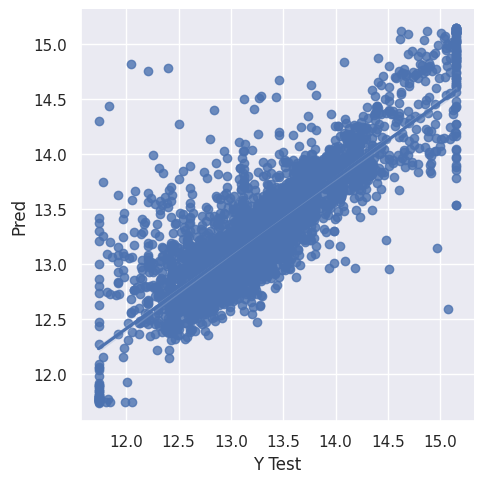

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

## **Model Saving**

In [ ]:
import joblib
joblib.dump(model,"Property_price_prediction.pkl")

['Property_price_prediction.pkl']

In [ ]:
model = joblib.load('Property_price_prediction.pkl')

## **Making predictions for test dataset using final model**

In [ ]:
df_test.reset_index(inplace=True)

In [ ]:
df_test.drop(columns = 'index', inplace = True)

In [ ]:
#Lets treat the skewness
for index in df_test.skew().index:
    if df_test.skew().loc[index]>0.5:
        df_test[index]=np.log1p(df_test[index])
        if df_test.skew().loc[index]<-0.5:
            df_test[index]=np.square(df_test[index])

In [ ]:
num_data = df_test.select_dtypes(include = [np.number])
cat_data = df_test.select_dtypes(exclude=[np.number])

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

In [ ]:
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [ ]:
Test = pd.concat([num, cat_data], axis = 1)

In [ ]:
Test.drop(columns = 'PropertyEvaluationvalue',inplace = True)

In [ ]:
#lets predict the price with our best model
prediction = model.predict(Test)

In [ ]:
prediction

array([12.925936  , 13.16385062, 14.25454332, ..., 14.62994532,
       14.68983419, 14.58744082])

In [ ]:
#lets make the dataframe for prediction
property_tax = pd.DataFrame(prediction, columns=["PropertyEvaluationvalue"])

In [ ]:
Test = pd.read_excel("/content/Test-1665386517573.xlsx")

Now I will create new column as SalePrice and add it to test dataset

In [ ]:
Test['PropertyEvaluationvalue'] = np.exp(property_tax)

In [ ]:
Test.head(5)

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24,4.108305e+05
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28,5.211799e+05
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31,1.551206e+06
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12,1.192305e+06
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07,6.496986e+05


In [ ]:
Test.to_csv("snt.csv",index=False)

In [ ]:
sn = pd.read_csv('/content/snt.csv')
sn.head(5)

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24,4.108305e+05
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28,5.211799e+05
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31,1.551206e+06
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12,1.192305e+06
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07,6.496986e+05


In [ ]:
sn.drop(['Borough','State','Surroundings','Address','ZipCode','Block','Lot','BldgClassCategory','NoOfResidentialUnits','NoOfCommercialUnits','TotalNoOfUnits','LandAreaInSqFt','GrossAreaInSqFt','YearOfConstruction','TaxClass_AtEvaluationTime','BldgClass_AtEvaluationTime','DateOfEvaluation'],axis=1,inplace=True)

In [ ]:
sn.head(5)

,PropertyID,PropertyEvaluationvalue
0,PR51101,4.108305e+05
1,PR51102,5.211799e+05
2,PR51103,1.551206e+06
3,PR51104,1.192305e+06
4,PR51105,6.496986e+05


In [ ]:
sn.to_csv("Property_Evaluation_value.csv",index=False)